<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q11_2_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

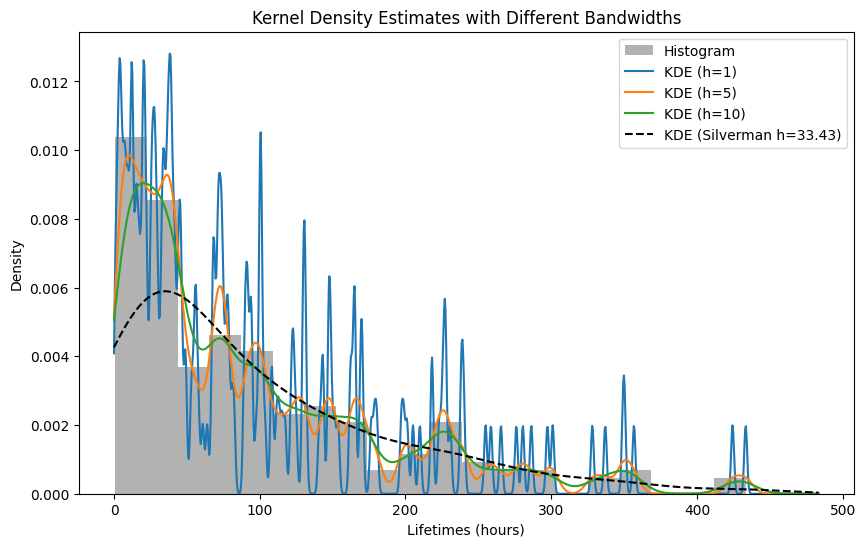

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# (a) Simulate dataset
np.random.seed(42)  # For reproducibility
n = 200
lambda_rate = 0.01
simulated_data = np.random.exponential(scale=1/lambda_rate, size=n)

# (b) Compute KDEs using bandwidths h = 1, 5, 10
def compute_kde(data, bandwidth):
    kde = gaussian_kde(data, bw_method=bandwidth / np.std(data))
    return kde

bandwidths = [1, 5, 10]
kdes = {h: compute_kde(simulated_data, h) for h in bandwidths}

# (c) Implement Silverman's rule of thumb to select optimal bandwidth
def silverman_bandwidth(data):
    std_dev = np.std(data)
    n = len(data)
    return 1.06 * std_dev * n ** (-1/5)

silverman_h = silverman_bandwidth(simulated_data)
kde_silverman = compute_kde(simulated_data, silverman_h)

# (d) Plot KDEs and overlay histogram
x_grid = np.linspace(0, simulated_data.max() + 50, 1000)

plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=20, density=True, alpha=0.6, color='gray', label='Histogram')

for h, kde in kdes.items():
    plt.plot(x_grid, kde(x_grid), label=f'KDE (h={h})')

plt.plot(x_grid, kde_silverman(x_grid), label=f'KDE (Silverman h={silverman_h:.2f})', linestyle='--', color='black')

plt.xlabel('Lifetimes (hours)')
plt.ylabel('Density')
plt.title('Kernel Density Estimates with Different Bandwidths')
plt.legend()
plt.show()
